In [1]:
import pandas as pd                     #mengolah data set
import matplotlib.pyplot as plt         #membuat grafik

data = pd.read_csv('Salary_Data.csv')
print(data.head())                      #Read Dataset

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [2]:
#count row and column
data.shape 

(6704, 6)

In [3]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [4]:
#Checking how many null values in each feature
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
#Checking unique values in Job Title Feature

data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [6]:
#Checking unique values of Education Level feature

data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [7]:
#cleaning data
rows_with_null = data[data.isnull().any(axis=1)]

rows_with_null

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [8]:
# Drop rows with missing values in 'Age' , 'Gender' and , 'Job Title' columns
data.dropna(subset=['Age', 'Gender','Job Title', 'Education Level'], inplace=True)

In [9]:
rows_with_null = data[data.isnull().any(axis=1)]

rows_with_null

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [10]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [11]:
#Linear Regression
x = data["Years of Experience"]                  #kolom year experience sebagai x
y = data["Salary"]                              #kolom salary sebagai y
xy = x * y
x_sqrd = x * x

#Least Squared Method
sum_x = x.sum()
sum_y = y.sum()
sum_xy = xy.sum()
sum_x_sqrd = x_sqrd.sum()
n = len(data)


#mencari gradien 
slope = ((n * sum_xy)-(sum_x * sum_y)) / ((n * sum_x_sqrd)-(sum_x**2))


#mencari titik sumbu potong
y_intercept = (sum_y - (slope * sum_x)) / n

#Model prediction (y = a + bx)
pred_y = slope * x + y_intercept


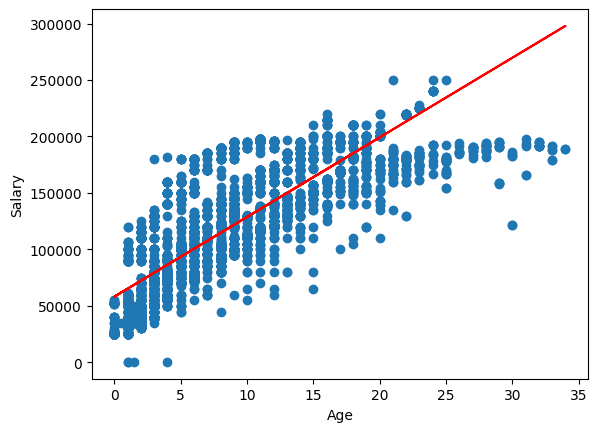

In [12]:
#Plotting 

plt.scatter(x, y)                       #membuat dots
plt.plot(x, pred_y, color="red")        #membuat garis berdasarkan
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()                              #menampilkan grafik

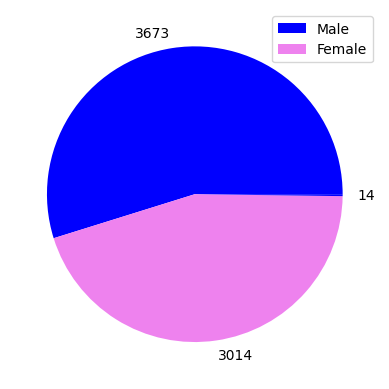

In [13]:
# Create a pie chart of gender result counts

labels = ["Male" , "Female"]
colors = ['blue', 'violet']
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts,colors=colors)
plt.legend(labels)
plt.show()

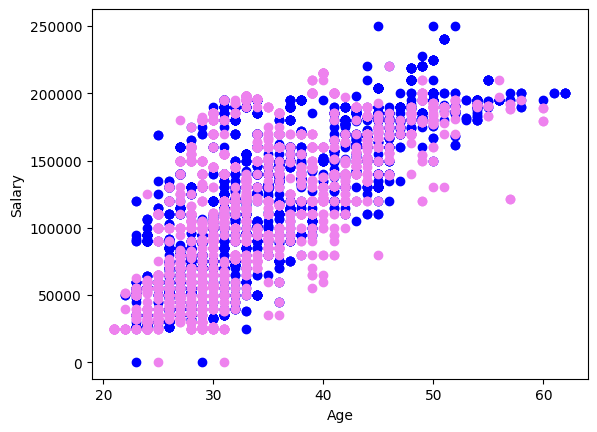

In [14]:
male = data[data.Gender == 'Male']
female = data[data.Gender == 'Female']

#Relationship between Age and Salary According to the gender
plt.scatter(male.Age , male.Salary , c = 'b')
plt.scatter(female.Age , female.Salary , c = 'violet')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

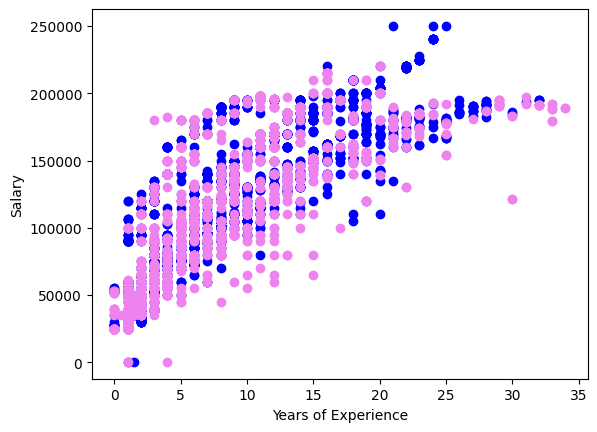

In [15]:
#Relationship between Years of Experience and Salary According to the gender

plt.scatter(male["Years of Experience"] , male.Salary , c = 'b')
plt.scatter(female["Years of Experience"] , female.Salary , c = 'violet')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

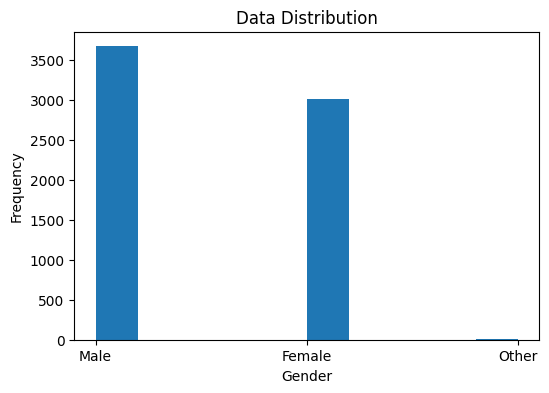

In [16]:
#Data distribution gender

plt.figure(figsize=(6,4))
plt.hist(data.Gender)
plt.title('Data Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

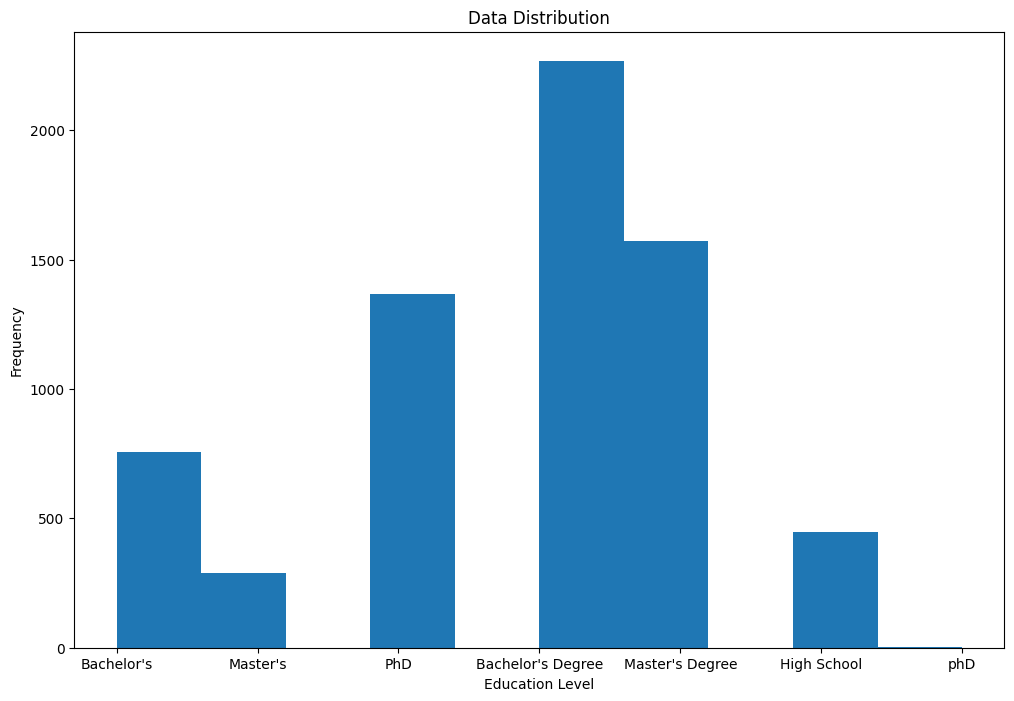

In [17]:
#Data distribution education level

plt.figure(figsize=(12,8))
plt.hist(data['Education Level'])
plt.title('Data Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

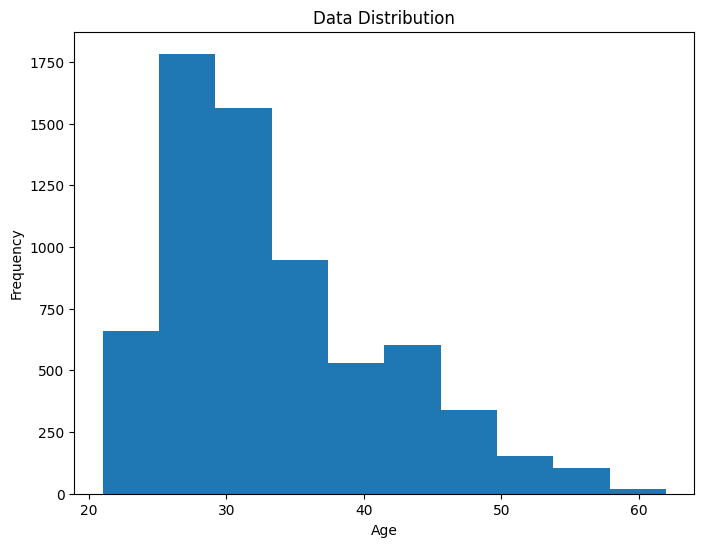

In [18]:
#Data distribution age

plt.figure(figsize=(8,6))
plt.hist(data["Age"])
plt.title('Data Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [20]:
data.describe()

,Age,Years of Experience,Salary
count,6701.000000,6700.000000,6698.000000
mean,33.621847,8.094851,115329.253061
std,7.614771,6.059441,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000
